In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.datasets import fetch_california_housing
#boston housing prices больше недоступен в sklearn

from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../housing_prepared.csv')
df = df.drop('ocean_proximity', axis=1)
X = df.drop('median_house_value', axis=1)
print(X.head())
print(X.shape)

y = df['median_house_value'].values
print(y.shape)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  id  bedroom_share  \
0       322.0       126.0         8.3252   0      14.659091   
1      2401.0      1138.0         8.3014   1      15.579659   
2       496.0       177.0         7.2574   2      12.951602   
3       558.0       219.0         5.6431   3      18.445840   
4       565.0       259.0         3.8462   4      17.209588   

   population_per_room  -  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0             0.365909  0          0       0       0         1           0  
1             0.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

print(X_train.shape, X_test.shape)

(16512, 17) (4128, 17)


Масштабирование данных

In [48]:
scaler = StandardScaler()
colnames = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=colnames)

X_train_scaled.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.272398,-1.372779,0.353107,0.222569,0.211228,0.783293,0.322906,-0.326196,0.650808,-0.211785,0.032984,-0.032103,-0.893915,-0.680098,-0.015566,-0.35543,2.631925
1,0.708948,-0.876636,1.646312,0.340293,0.593094,-0.093554,0.672027,-0.035843,-0.342420,0.342185,-0.074374,-0.032103,-0.893915,-0.680098,-0.015566,-0.35543,2.631925


t-SNE

/Users/victorpotysyev/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


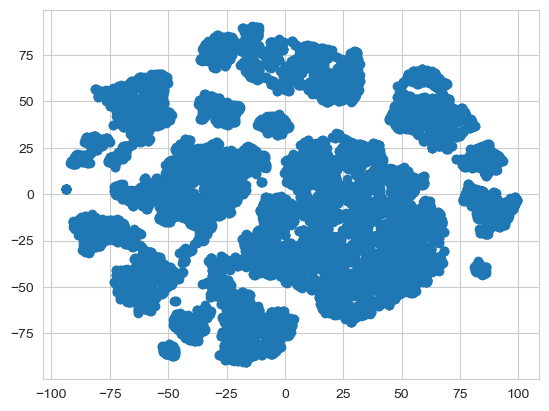

In [49]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

KMeans кластеризация

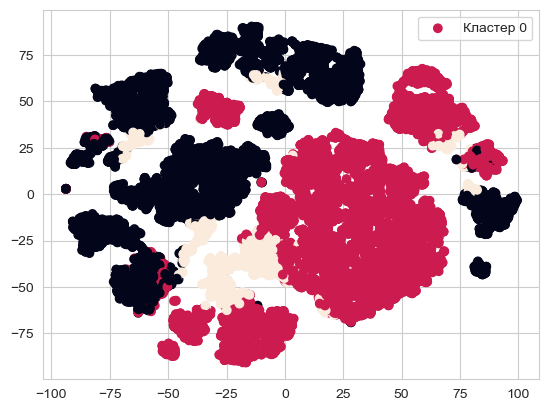

In [57]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_train = kmeans_3.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])

plt.show()

In [53]:
print("Средняя цена для класса 1: {}, для класса 2: {}, для класса 3: {}.".format(y_train[labels_train == 0].mean(),y_train[labels_train == 1].mean(),y_train[labels_train == 2].mean()))

Средняя цена для класса 1: 189464.65147997678, для класса 2: 220179.66718544235, для класса 3: 218032.86898184687.


In [58]:
print("Средняя значение заработка  для класса 1: {}, для класса 2: {}, для класса 3: {}.".format(X_train.loc[labels_train == 0, 'median_income'].mean(),X_train.loc[labels_train == 1, 'median_income'].mean(),X_train.loc[labels_train == 2, 'median_income'].mean()))

Средняя значение количества  для класса 1: 3.7310424405107185, для класса 2: 3.950985274751585, для класса 3: 4.232115074980261.
